In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pd.set_option('display.max_columns', None)

### Notes on the data:

* A 'Not in Universe' designation indicates that this question was not asked of the interviewee. 

* MSA = Metropolitan Statistical Area. An MSA consists of one or more counties that contain a city of 50,000 or. more inhabitants, or contain a Census Bureau-defined urbanized area (UA) and have a total population of at least 100,000 (75,000 in New England).

In [246]:
#setting column headers

headers = ['age', 'worker_class', 'industry_detailed','occupation_detailed', 'education', 'wage_per_hour', 'education_current_enrollment','marital_status', 
           'industry_major', 'occupation_major', 'race', 'hispanic_origin', 'sex', 'labor_union','unemployment_reason', 'employment_status', 
           'cap_gains', 'cap_loss', 'stock_dividends', 'tax_filer_stat', 'residence_region', 'residence_state', 'household_detailed', 'household_summary', 'instance_weight',
           'mig_code_change_in_msa', 'mig_code_change_in_reg', 'move_in_region', 'same_res_one_year_ago', 'pre_res_sunbelt','num_employed', 'fam_members_under_18','country_birth_father','country_birth_mother',
           'country_birth_self', 'citizenship', 'self_employed', 'vets_admin_quest', 'veterans_benefits', 'weeks_worked', 'year', 'target']

In [247]:
train_df = pd.read_csv('./data/census_income_learn.csv', names=headers, index_col=False)
test_df = pd.read_csv('./data/census_income_test.csv', names=headers, index_col=False)

I wanted to pull in world development indicators for country of origin. After further reflection, I'm not sure how useful this information can be without also knowing what a year a person or their parents arrived in the US. I do still think that it is an important item for future examination. This could be an interesting time series investigation, given the right data. 

In [248]:
dev_df = pd.read_excel('./data/world_bank_income_rankings_2021.xlsx', sheet_name='List of economies', usecols=['Economy', 'Income group'])
dev_df.head(3)

,Economy,Income group
0,Aruba,High income
1,Afghanistan,Low income
2,Angola,Lower middle income


In [249]:
train_df.shape

(199523, 42)

In [250]:
train_df.head(3)

,age,worker_class,industry_detailed,occupation_detailed,education,wage_per_hour,education_current_enrollment,marital_status,industry_major,occupation_major,race,hispanic_origin,sex,labor_union,unemployment_reason,employment_status,cap_gains,cap_loss,stock_dividends,tax_filer_stat,residence_region,residence_state,household_detailed,household_summary,instance_weight,mig_code_change_in_msa,mig_code_change_in_reg,move_in_region,same_res_one_year_ago,pre_res_sunbelt,num_employed,fam_members_under_18,country_birth_father,country_birth_mother,country_birth_self,citizenship,self_employed,vets_admin_quest,veterans_benefits,weeks_worked,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.


In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           199523 non-null  int64  
 1   worker_class                  199523 non-null  object 
 2   industry_detailed             199523 non-null  int64  
 3   occupation_detailed           199523 non-null  int64  
 4   education                     199523 non-null  object 
 5   wage_per_hour                 199523 non-null  int64  
 6   education_current_enrollment  199523 non-null  object 
 7   marital_status                199523 non-null  object 
 8   industry_major                199523 non-null  object 
 9   occupation_major              199523 non-null  object 
 10  race                          199523 non-null  object 
 11  hispanic_origin               199523 non-null  object 
 12  sex                           199523 non-nul

In [252]:
train_df.describe()

,age,industry_detailed,occupation_detailed,wage_per_hour,cap_gains,cap_loss,stock_dividends,instance_weight,num_employed,self_employed,veterans_benefits,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [253]:
train_df.columns

Index(['age', 'worker_class', 'industry_detailed', 'occupation_detailed',
       'education', 'wage_per_hour', 'education_current_enrollment',
       'marital_status', 'industry_major', 'occupation_major', 'race',
       'hispanic_origin', 'sex', 'labor_union', 'unemployment_reason',
       'employment_status', 'cap_gains', 'cap_loss', 'stock_dividends',
       'tax_filer_stat', 'residence_region', 'residence_state',
       'household_detailed', 'household_summary', 'instance_weight',
       'mig_code_change_in_msa', 'mig_code_change_in_reg', 'move_in_region',
       'same_res_one_year_ago', 'pre_res_sunbelt', 'num_employed',
       'fam_members_under_18', 'country_birth_father', 'country_birth_mother',
       'country_birth_self', 'citizenship', 'self_employed',
       'vets_admin_quest', 'veterans_benefits', 'weeks_worked', 'year',
       'target'],
      dtype='object')

In [254]:
train_df['worker_class'].value_counts()

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: worker_class, dtype: int64

In [255]:
column_list = list(train_df.columns)

In [256]:
#uncomment the code below to see value counts for each column. I used this when considering how I wanted to handle categorical variables, but please note that this will print a very long output.

for col in column_list:
    print(col + '\n', train_df[col].value_counts(normalize=True), '\n')

age
 34    0.017487
35    0.017291
36    0.016805
31    0.016795
33    0.016740
        ...   
85    0.002120
86    0.001744
87    0.001509
88    0.001208
89    0.000977
Name: age, Length: 91, dtype: float64 

worker_class
  Not in universe                   0.502423
 Private                           0.361001
 Self-employed-not incorporated    0.042326
 Local government                  0.039013
 State government                  0.021186
 Self-employed-incorporated        0.016364
 Federal government                0.014660
 Never worked                      0.002200
 Without pay                       0.000827
Name: worker_class, dtype: float64 

industry_detailed
 0     0.504624
33    0.085554
43    0.041514
4     0.029992
42    0.023471
45    0.022464
29    0.021095
37    0.020158
41    0.019867
32    0.018023
35    0.016940
39    0.014720
34    0.013858
44    0.012775
2     0.011006
11    0.008841
50    0.008540
40    0.008275
47    0.008240
38    0.008164
24    0.007533
12    0.0

'age',                                   use, no action
'worker_class',                          labelencode
'industry_detailed',                     use, no action
'occupation_detailed',                   use, no action
'education',                             labelencode
'wage_per_hour',                         investigate
'education_current_enrollment',          labelencode
'marital_status',                        labelencode
'industry_major',                        get_dummies
'occupation_major',                      get_dummies
'race',                                  labelencode or get_dummies?
'hispanic_origin',                       labelencode
'sex',                                   binarize
'labor_union',                           labelencode
'unemployment_reason',
'employment_status',
'cap_gains',
'cap_loss',
'stock_dividends',
'tax_filer_stat',
'residence_region',
'residence_state',
'household_detailed',
'household_summary',
'instance_weight',
'mig_code_change_in_msa',
'mig_code_change_in_reg',
'move_in_region',
'same_res_one_year_ago',
'pre_res_sunbelt',
'num_employed',
'fam_members_under_18',
'country_birth_father',
'country_birth_mother',
'country_birth_self',
'citizenship',
'self_employed',
'vets_admin_quest',
'veterans_benefits',
'weeks_worked',
'year',
'target'

Drop: year

labelencode: target, worker_class, education, 

getdummies: 

think about: wage_per_hour

In [261]:
def prep_for_model(df):
    
    #binarize sex (0=male, 1=female)
    df['sex'] = [1 if sex.strip() == 'Female' else 0 for sex in df['sex']]
    
    #binarize birth country father, mother, self
    df['country_birth_father'] = [1 if country.strip() == 'United-States' else 0 for country in df['country_birth_father']]
    df['country_birth_mother'] = [1 if country.strip() == 'United-States' else 0 for country in df['country_birth_mother']]
    df['country_birth_self'] = [1 if country.strip() == 'United-States' else 0 for country in df['country_birth_self']]
    
    #encode categoricals
    features_to_encode = ['worker_class', 'education', 'education_current_enrollment', 'marital_status', 'race', 'hispanic_origin', 'labor_union',
                     'unemployment_reason', 'employment_status', 'tax_filer_stat', 'household_summary', 'same_res_one_year_ago', 'citizenship', 
                     'vets_admin_quest', 'industry_major', 'occupation_major']
    for cat in features_to_encode:
        le = LabelEncoder()
        le.fit(df[cat])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print('labelencode map: ', cat)
        print(le_name_mapping)
        df[cat] = le.transform(df[cat])
        
    #map parents in household for family members under age 18
    fam_members_under_18_map = {' Not in universe': 2, ' Both parents present': 2, ' Mother only present': 1, ' Father only present': 1, ' Neither parent present': 0}
    df['fam_members_under_18'] = df['fam_members_under_18'].map(fam_members_under_18_map)
    
    #get dummies
    df = pd.get_dummies(train_df, columns=['race'], drop_first=True)
    
        
    #drop features from modeling
    df.drop(columns=['instance_weight', 'year', 'household_detailed', 'residence_region', 'residence_state', 'mig_code_change_in_msa',
                    'mig_code_change_in_reg', 'move_in_region', 'pre_res_sunbelt'], inplace=True)
    
    return df
    

In [258]:
model_df = prep_for_model(train_df)

{' Federal government': 0, ' Local government': 1, ' Never worked': 2, ' Not in universe': 3, ' Private': 4, ' Self-employed-incorporated': 5, ' Self-employed-not incorporated': 6, ' State government': 7, ' Without pay': 8}
{' 10th grade': 0, ' 11th grade': 1, ' 12th grade no diploma': 2, ' 1st 2nd 3rd or 4th grade': 3, ' 5th or 6th grade': 4, ' 7th and 8th grade': 5, ' 9th grade': 6, ' Associates degree-academic program': 7, ' Associates degree-occup /vocational': 8, ' Bachelors degree(BA AB BS)': 9, ' Children': 10, ' Doctorate degree(PhD EdD)': 11, ' High school graduate': 12, ' Less than 1st grade': 13, ' Masters degree(MA MS MEng MEd MSW MBA)': 14, ' Prof school degree (MD DDS DVM LLB JD)': 15, ' Some college but no degree': 16}
{' College or university': 0, ' High school': 1, ' Not in universe': 2}
{' Divorced': 0, ' Married-A F spouse present': 1, ' Married-civilian spouse present': 2, ' Married-spouse absent': 3, ' Never married': 4, ' Separated': 5, ' Widowed': 6}
{' Amer Indi

In [259]:
model_df

,age,worker_class,industry_detailed,occupation_detailed,education,wage_per_hour,education_current_enrollment,marital_status,industry_major,occupation_major,hispanic_origin,sex,labor_union,unemployment_reason,employment_status,cap_gains,cap_loss,stock_dividends,tax_filer_stat,household_summary,same_res_one_year_ago,num_employed,fam_members_under_18,country_birth_father,country_birth_mother,country_birth_self,citizenship,self_employed,vets_admin_quest,veterans_benefits,weeks_worked,target,race_1,race_2,race_3,race_4
0,73,3,0,0,12,0,2,6,14,6,0,1,1,3,2,0,0,0,4,6,1,0,2,1,1,1,4,0,1,2,0,- 50000.,0,0,0,1
1,58,6,4,34,16,0,2,0,4,8,0,0,1,3,0,0,0,0,0,4,0,1,2,1,1,1,4,0,1,2,52,- 50000.,0,0,0,1
2,18,3,0,0,0,0,1,4,14,6,0,1,1,3,2,0,0,0,4,0,1,0,2,0,0,0,0,0,1,2,0,- 50000.,1,0,0,0
3,9,3,0,0,10,0,2,4,14,6,0,1,1,3,0,0,0,0,4,2,2,0,2,1,1,1,4,0,1,0,0,- 50000.,0,0,0,1
4,10,3,0,0,10,0,2,4,14,6,0,1,1,3,0,0,0,0,4,2,2,0,2,1,1,1,4,0,1,0,0,- 50000.,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,3,0,0,5,0,2,2,14,6,0,0,1,3,2,0,0,0,1,4,1,0,2,0,1,1,4,0,1,2,0,- 50000.,0,0,0,1
199519,65,5,37,2,1,0,2,2,2,2,0,0,1,3,0,6418,0,9,3,4,2,1,2,1,1,1,4,0,1,2,52,- 50000.,0,0,0,1
199520,47,3,0,0,16,0,2,2,14,6,0,0,1,3,0,0,0,157,2,4,1,6,2,0,0,0,1,0,1,2,52,- 50000.,0,0,0,1
199521,16,3,0,0,0,0,1,4,14,6,0,1,1,3,2,0,0,0,4,2,1,0,2,1,1,1,4,0,1,2,0,- 50000.,0,0,0,1


In [222]:
le = LabelEncoder()
le.fit(train_df['worker_class'])

LabelEncoder()

In [223]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_name_mapping)

array([' Federal government', ' Local government', ' Never worked',
       ' Not in universe', ' Private', ' Self-employed-incorporated',
       ' Self-employed-not incorporated', ' State government',
       ' Without pay'], dtype=object)

In [224]:
features_to_encode = ['worker_class', 'education', 'education_current_enrollment', 'marital_status', 'race', 'hispanic_origin', 'labor_union',
                 'unemployment_reason', 'employment_status', 'tax_filer_stat', 'household_summary', 'same_res_one_year_ago', 'citizenship', 
                 'vets_admin_quest']
for cat in features_to_encode:
    le = LabelEncoder()
    le.fit(train_df[cat])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    # df[cat] = le.transform(df[cat])

{' Federal government': 0, ' Local government': 1, ' Never worked': 2, ' Not in universe': 3, ' Private': 4, ' Self-employed-incorporated': 5, ' Self-employed-not incorporated': 6, ' State government': 7, ' Without pay': 8}
{' 10th grade': 0, ' 11th grade': 1, ' 12th grade no diploma': 2, ' 1st 2nd 3rd or 4th grade': 3, ' 5th or 6th grade': 4, ' 7th and 8th grade': 5, ' 9th grade': 6, ' Associates degree-academic program': 7, ' Associates degree-occup /vocational': 8, ' Bachelors degree(BA AB BS)': 9, ' Children': 10, ' Doctorate degree(PhD EdD)': 11, ' High school graduate': 12, ' Less than 1st grade': 13, ' Masters degree(MA MS MEng MEd MSW MBA)': 14, ' Prof school degree (MD DDS DVM LLB JD)': 15, ' Some college but no degree': 16}
{' College or university': 0, ' High school': 1, ' Not in universe': 2}
{' Divorced': 0, ' Married-A F spouse present': 1, ' Married-civilian spouse present': 2, ' Married-spouse absent': 3, ' Never married': 4, ' Separated': 5, ' Widowed': 6}
{' Amer Indi

In [ ]:
features_to_encode = ['worker_class', 'education', 'education_current_enrollment', 'marital_status', 'race', 'hispanic_origin', 'labor_union',
                     'unemployment_reason', 'employment_status', 'tax_filer_stat', 'household_summary', 'same_res_one_year_ago', 'citizenship', 
                     'vets_admin_quest']

In [189]:
train_df['fam_members_under_18'].value_counts()

 Not in universe           144232
 Both parents present       38983
 Mother only present        12772
 Father only present         1883
 Neither parent present      1653
Name: fam_members_under_18, dtype: int64

<AxesSubplot:xlabel='count', ylabel='country_birth_father'>

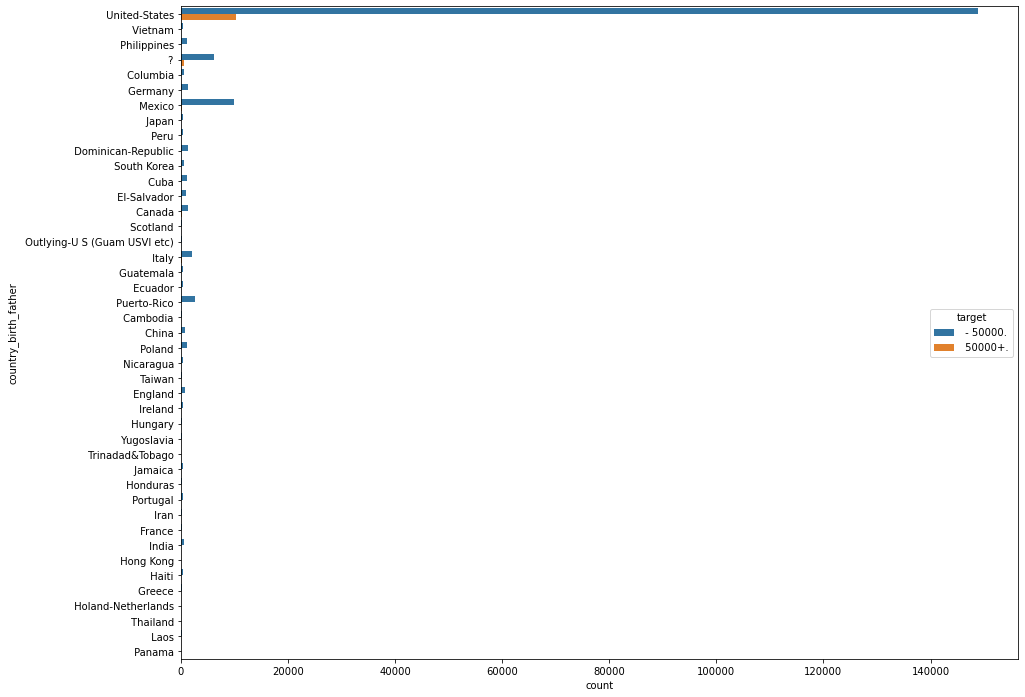

In [208]:
plt.figure(figsize=(15,12))
sns.countplot(y = train_df['country_birth_father'], hue = train_df['target'])

<AxesSubplot:xlabel='count', ylabel='country_birth_self'>

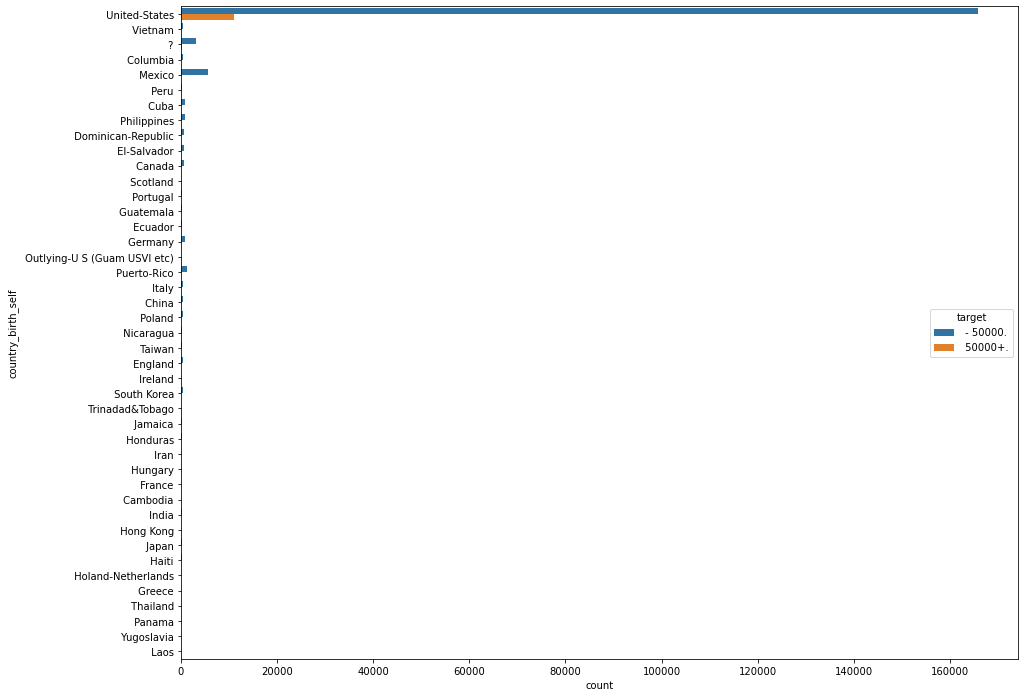

In [211]:
plt.figure(figsize=(15,12))
sns.countplot(y = train_df['country_birth_self'], hue = train_df['target'])

<AxesSubplot:xlabel='count', ylabel='citizenship'>

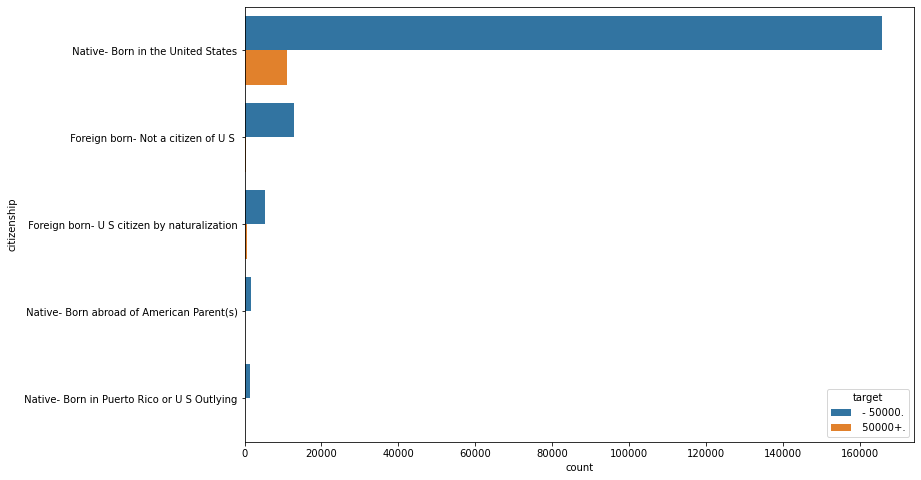

In [215]:
plt.figure(figsize=(12,8))
sns.countplot(y = train_df['citizenship'], hue = train_df['target'])

In [220]:
train_df['veterans_benefits'].value_counts()

2    150130
0     47409
1      1984
Name: veterans_benefits, dtype: int64

In [136]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           199523 non-null  int64  
 1   worker_class                  199523 non-null  object 
 2   industry_detailed             199523 non-null  int64  
 3   occupation_detailed           199523 non-null  int64  
 4   education                     199523 non-null  object 
 5   wage_per_hour                 199523 non-null  int64  
 6   education_current_enrollment  199523 non-null  object 
 7   marital_status                199523 non-null  object 
 8   industry_major                199523 non-null  object 
 9   occupation_major              199523 non-null  object 
 10  race                          199523 non-null  object 
 11  hispanic_origin               199523 non-null  object 
 12  sex                           199523 non-nul